# Fruits and Vegetables (Category 2) vs Honey

## Does honey production correlate with the production of any other USDA commodities in your category/group? Which are more highly correlated? - Correlation
## Have the production levels of each commodity in your category changed over time?

## Data Wrangling

### Import Packages

In [464]:
import math
from numpy import nan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from pylab import *
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

### Read in Data

In [465]:
usdaHoney = pd.read_csv(r"C:\Users\sdstc\Documents\Education\Other\Entity Academy\Final Project\Final Project\Datasets for Final Project\First Choice Dataset\usdaHoney2.csv")

In [466]:
usdaHoney.head()

,Unnamed: 0,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
0,1,"Almonds, Shelled Basis",US,United States,1998,Production,(MT),235884.0,4
1,2,"Almonds, Shelled Basis",US,United States,1999,Production,(MT),361362.0,4
2,3,"Almonds, Shelled Basis",US,United States,2000,Production,(MT),303700.0,4
3,4,"Almonds, Shelled Basis",US,United States,2001,Production,(MT),376488.0,4
4,5,"Almonds, Shelled Basis",US,United States,2002,Production,(MT),494416.0,4


### Drop unnecessary column(s): Unnamed: 0

In [467]:
usdaHoney = usdaHoney.drop(['Unnamed: 0'], axis = 1)

### Create a new dataframe showing only commodities in category 2: fruits and vegetables

In [468]:
fruits_veggies = usdaHoney[usdaHoney.Category == 2]
fruits_veggies

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
26,"Apple Juice, Concentrated",US,United States,1998,Production,(MT),153162.0,2
27,"Apple Juice, Concentrated",US,United States,1999,Production,(MT),152397.0,2
28,"Apple Juice, Concentrated",US,United States,2000,Production,(MT),143892.0,2
29,"Apple Juice, Concentrated",US,United States,2001,Production,(MT),119777.0,2
30,"Apple Juice, Concentrated",US,United States,2002,Production,(MT),91106.0,2
...,...,...,...,...,...,...,...,...
8104,Raisins,US,United States,2012,Production,(MT),313795.0,2
8188,"Apples, Fresh",US,United States,2012,Production,(MT),4048993.0,2
8225,"Peaches & Nectarines, Fresh",US,United States,2012,Production,(MT),1038536.0,2
8241,"Grapes, Fresh Table",US,United States,2007,Production,(MT),834910.0,2


### Drop column(s) from fruits_veggies dataframe that is no longer necessary: Category

In [469]:
fruits_veggies = fruits_veggies.drop(['Category'], axis=1)

### Filter only the max production value per year for each chosen commodity of fruits and veggetables

In [470]:
fruits_veggies = fruits_veggies.groupby(['Commodity_Description','Year'], as_index=False).agg(max)
fruits_veggies

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
0,"Apple Juice, Concentrated",1998,US,United States,Production,(MT),153162.0
1,"Apple Juice, Concentrated",1999,US,United States,Production,(MT),152397.0
2,"Apple Juice, Concentrated",2000,US,United States,Production,(MT),143892.0
3,"Apple Juice, Concentrated",2001,US,United States,Production,(MT),119777.0
4,"Apple Juice, Concentrated",2002,US,United States,Production,(MT),91106.0
...,...,...,...,...,...,...,...
374,"Tangerines/Mandarins, Fresh",2008,US,United States,Production,(1000 MT),520.0
375,"Tangerines/Mandarins, Fresh",2009,US,United States,Production,(1000 MT),583.0
376,"Tangerines/Mandarins, Fresh",2010,US,United States,Production,(1000 MT),643.0
377,"Tangerines/Mandarins, Fresh",2011,US,United States,Production,(1000 MT),635.0


### To double check that it works, we created another dataframe showing only one test commodity's data

In [471]:
usdaHoney1 =usdaHoney.loc[(usdaHoney['Commodity_Description'] == 'Apples, Fresh')]
usdaHoney1

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
34,"Apples, Fresh",US,United States,1998,Production,(MT),5282724.0,2
35,"Apples, Fresh",US,United States,1999,Production,(MT),4822010.0,2
36,"Apples, Fresh",US,United States,2000,Production,(MT),4800686.0,2
37,"Apples, Fresh",US,United States,2001,Production,(MT),4274204.0,2
38,"Apples, Fresh",US,United States,2002,Production,(MT),3866379.0,2
...,...,...,...,...,...,...,...,...
7553,"Apples, Fresh",US,United States,2012,Production,(MT),4048993.0,2
7684,"Apples, Fresh",US,United States,2011,Production,(MT),4231474.0,2
7685,"Apples, Fresh",US,United States,2012,Production,(MT),4048993.0,2
7908,"Apples, Fresh",US,United States,2012,Production,(MT),4048993.0,2


In [472]:
fruits_veggies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Commodity_Description  379 non-null    object 
 1   Year                   379 non-null    int64  
 2   Country_Code           379 non-null    object 
 3   Country_Name           379 non-null    object 
 4   Attribute_Description  379 non-null    object 
 5   Unit_Description       379 non-null    object 
 6   Value                  379 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.9+ KB


### Look at different measurement types

In [473]:
print(fruits_veggies['Unit_Description'].unique())

['(MT)' '(1000 MT)' '(MT, Net Weight)']


In [474]:
print(fruits_veggies['Commodity_Description'].unique())

['Apple Juice, Concentrated' 'Apples, Fresh' 'Asparagus, Fresh'
 'Avocados, Fresh' 'Cherries (Sweet&Sour), Fresh' 'Citrus, Other, Fresh'
 'Corn' 'Fresh Apricots' 'Fresh Cherries,(Sweet&Sour)'
 'Fresh Peaches & Nectarines' 'Fresh Plums & Prunes' 'Grapefruit, Fresh'
 'Grapes' 'Grapes, Fresh' 'Grapes, Fresh Table' 'Grapes, Table, Fresh'
 'Kiwifruit' 'Lemons, Fresh' 'Lemons/Limes, Fresh' 'Orange Juice'
 'Oranges, Fresh' 'Peaches & Nectarines, Fresh' 'Peaches, Canned'
 'Pears, Fresh' 'Potato Products, Frozen' 'Prunes (Plums, Dried)'
 'Raisins' 'Strawberries, Fresh' 'Strawberries, Frozen'
 'Tangerines, Fresh' 'Tangerines/Mandarins, Fresh']


### Get rid of duplicates and leave behind the commodities with the highest production value

In [475]:
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Tangerines, Fresh']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Grapes, Table, Fresh']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Grapes']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Grapes, Fresh Table']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Cherries (Sweet&Sour), Fresh']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Peaches, Canned']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Strawberries, Frozen']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Prunes (Plums, Dried)']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Lemons, Fresh']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Peaches & Nectarines, Fresh']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Apple Juice, Concentrated']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Oranges Juice']
print(fruits_veggies['Commodity_Description'].unique())

['Apples, Fresh' 'Asparagus, Fresh' 'Avocados, Fresh'
 'Citrus, Other, Fresh' 'Corn' 'Fresh Apricots'
 'Fresh Cherries,(Sweet&Sour)' 'Fresh Peaches & Nectarines'
 'Fresh Plums & Prunes' 'Grapefruit, Fresh' 'Grapes, Fresh' 'Kiwifruit'
 'Lemons/Limes, Fresh' 'Orange Juice' 'Oranges, Fresh' 'Pears, Fresh'
 'Potato Products, Frozen' 'Raisins' 'Strawberries, Fresh'
 'Tangerines/Mandarins, Fresh']


In [476]:
fruits_veggies

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
11,"Apples, Fresh",1998,US,United States,Production,(MT),5282724.0
12,"Apples, Fresh",1999,US,United States,Production,(MT),5746060.0
13,"Apples, Fresh",2000,US,United States,Production,(MT),5675890.0
14,"Apples, Fresh",2001,US,United States,Production,(MT),5065060.0
15,"Apples, Fresh",2002,US,United States,Production,(MT),4605810.0
...,...,...,...,...,...,...,...
374,"Tangerines/Mandarins, Fresh",2008,US,United States,Production,(1000 MT),520.0
375,"Tangerines/Mandarins, Fresh",2009,US,United States,Production,(1000 MT),583.0
376,"Tangerines/Mandarins, Fresh",2010,US,United States,Production,(1000 MT),643.0
377,"Tangerines/Mandarins, Fresh",2011,US,United States,Production,(1000 MT),635.0


### Create a new data frame for the honey commodity only

In [477]:
Honey = usdaHoney[usdaHoney.Commodity_Description == 'Honey']
Honey

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
8298,Honey,US,United States,1998,Production,MT,99571.62321,6
8299,Honey,US,United States,1999,Production,MT,91800.71933,6
8300,Honey,US,United States,2000,Production,MT,99589.31322,6
8301,Honey,US,United States,2001,Production,MT,84253.43532,6
8302,Honey,US,United States,2002,Production,MT,77684.09135,6
8303,Honey,US,United States,2003,Production,MT,82268.52548,6
8304,Honey,US,United States,2004,Production,MT,82884.04711,6
8305,Honey,US,United States,2005,Production,MT,78910.59871,6
8306,Honey,US,United States,2006,Production,MT,69960.81442,6
8307,Honey,US,United States,2007,Production,MT,66959.40939,6


### Drop unnecessary column(s)

In [478]:
Honey = Honey.drop(['Category'], axis=1)

In [479]:
Honey.head()

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value
8298,Honey,US,United States,1998,Production,MT,99571.62321
8299,Honey,US,United States,1999,Production,MT,91800.71933
8300,Honey,US,United States,2000,Production,MT,99589.31322
8301,Honey,US,United States,2001,Production,MT,84253.43532
8302,Honey,US,United States,2002,Production,MT,77684.09135


### Convert Metric Tons to 1000 Metric Tons underneath the Unit_Description column

In [480]:
Honey['Unit_Description'] = Honey['Unit_Description'].replace(['MT',...],['(1000 MT)',...])
Honey

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value
8298,Honey,US,United States,1998,Production,(1000 MT),99571.62321
8299,Honey,US,United States,1999,Production,(1000 MT),91800.71933
8300,Honey,US,United States,2000,Production,(1000 MT),99589.31322
8301,Honey,US,United States,2001,Production,(1000 MT),84253.43532
8302,Honey,US,United States,2002,Production,(1000 MT),77684.09135
8303,Honey,US,United States,2003,Production,(1000 MT),82268.52548
8304,Honey,US,United States,2004,Production,(1000 MT),82884.04711
8305,Honey,US,United States,2005,Production,(1000 MT),78910.59871
8306,Honey,US,United States,2006,Production,(1000 MT),69960.81442
8307,Honey,US,United States,2007,Production,(1000 MT),66959.40939


In [481]:
Honey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 8298 to 8312
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Commodity_Description  15 non-null     object 
 1   Country_Code           15 non-null     object 
 2   Country_Name           15 non-null     object 
 3   Year                   15 non-null     int64  
 4   Attribute_Description  15 non-null     object 
 5   Unit_Description       15 non-null     object 
 6   Value                  15 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 960.0+ bytes


In [482]:
honey1000MT = Honey.Value / 1000
honey1000MT

8298    99.571623
8299    91.800719
8300    99.589313
8301    84.253435
8302    77.684091
8303    82.268525
8304    82.884047
8305    78.910599
8306    69.960814
8307    66.959409
8308    73.922469
8309    65.801394
8310    79.511605
8311    66.768902
8312    63.914006
Name: Value, dtype: float64

In [483]:
Honey['Value'] = honey1000MT
Honey

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value
8298,Honey,US,United States,1998,Production,(1000 MT),99.571623
8299,Honey,US,United States,1999,Production,(1000 MT),91.800719
8300,Honey,US,United States,2000,Production,(1000 MT),99.589313
8301,Honey,US,United States,2001,Production,(1000 MT),84.253435
8302,Honey,US,United States,2002,Production,(1000 MT),77.684091
8303,Honey,US,United States,2003,Production,(1000 MT),82.268525
8304,Honey,US,United States,2004,Production,(1000 MT),82.884047
8305,Honey,US,United States,2005,Production,(1000 MT),78.910599
8306,Honey,US,United States,2006,Production,(1000 MT),69.960814
8307,Honey,US,United States,2007,Production,(1000 MT),66.959409


### Test to see if fruits_veggies dataframe contains all the necessary fruits and vegetables and to see if their Unit_Description needs changing

In [484]:
test = fruits_veggies[fruits_veggies.Commodity_Description == 'Potato Products, Frozen']
test1 = fruits_veggies[fruits_veggies.Commodity_Description == 'Tangerines/Mandarins, Fresh']
test2 = fruits_veggies[fruits_veggies.Commodity_Description == 'Corn']
test3 = fruits_veggies[fruits_veggies.Commodity_Description == 'Oranges, Fresh']
test4 = fruits_veggies[fruits_veggies.Commodity_Description == 'Grapefruit, Fresh']
test5 = fruits_veggies[fruits_veggies.Commodity_Description == 'Lemons/Limes, Fresh']
test

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
306,"Potato Products, Frozen",1998,US,United States,Production,"(MT, Net Weight)",3565812.0
307,"Potato Products, Frozen",1999,US,United States,Production,"(MT, Net Weight)",3497555.0
308,"Potato Products, Frozen",2000,US,United States,Production,"(MT, Net Weight)",4330706.0
309,"Potato Products, Frozen",2001,US,United States,Production,"(MT, Net Weight)",3749850.0
310,"Potato Products, Frozen",2002,US,United States,Production,"(MT, Net Weight)",3837591.0
311,"Potato Products, Frozen",2003,US,United States,Production,"(MT, Net Weight)",3751746.0
312,"Potato Products, Frozen",2004,US,United States,Production,"(MT, Net Weight)",3856776.0
313,"Potato Products, Frozen",2005,US,United States,Production,"(MT, Net Weight)",3999000.0
314,"Potato Products, Frozen",2006,US,United States,Production,"(MT, Net Weight)",3841932.0


### Convert the Unit_Description and Production Value of test for potatoes, before appending these test dataframes to the final dataframe for analysis

In [485]:
test['Unit_Description'] = test['Unit_Description'].replace(['(MT, Net Weight)',...],['(1000 MT)',...])
test

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
306,"Potato Products, Frozen",1998,US,United States,Production,(1000 MT),3565812.0
307,"Potato Products, Frozen",1999,US,United States,Production,(1000 MT),3497555.0
308,"Potato Products, Frozen",2000,US,United States,Production,(1000 MT),4330706.0
309,"Potato Products, Frozen",2001,US,United States,Production,(1000 MT),3749850.0
310,"Potato Products, Frozen",2002,US,United States,Production,(1000 MT),3837591.0
311,"Potato Products, Frozen",2003,US,United States,Production,(1000 MT),3751746.0
312,"Potato Products, Frozen",2004,US,United States,Production,(1000 MT),3856776.0
313,"Potato Products, Frozen",2005,US,United States,Production,(1000 MT),3999000.0
314,"Potato Products, Frozen",2006,US,United States,Production,(1000 MT),3841932.0


In [486]:
test1000MT = test.Value / 1000
test1000MT

306    3565.812
307    3497.555
308    4330.706
309    3749.850
310    3837.591
311    3751.746
312    3856.776
313    3999.000
314    3841.932
Name: Value, dtype: float64

In [487]:
test['Value'] = test1000MT
test

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
306,"Potato Products, Frozen",1998,US,United States,Production,(1000 MT),3565.812
307,"Potato Products, Frozen",1999,US,United States,Production,(1000 MT),3497.555
308,"Potato Products, Frozen",2000,US,United States,Production,(1000 MT),4330.706
309,"Potato Products, Frozen",2001,US,United States,Production,(1000 MT),3749.850
310,"Potato Products, Frozen",2002,US,United States,Production,(1000 MT),3837.591
311,"Potato Products, Frozen",2003,US,United States,Production,(1000 MT),3751.746
312,"Potato Products, Frozen",2004,US,United States,Production,(1000 MT),3856.776
313,"Potato Products, Frozen",2005,US,United States,Production,(1000 MT),3999.000
314,"Potato Products, Frozen",2006,US,United States,Production,(1000 MT),3841.932


In [488]:
test1

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
364,"Tangerines/Mandarins, Fresh",1998,US,United States,Production,(1000 MT),401.0
365,"Tangerines/Mandarins, Fresh",1999,US,United States,Production,(1000 MT),505.0
366,"Tangerines/Mandarins, Fresh",2000,US,United States,Production,(1000 MT),425.0
367,"Tangerines/Mandarins, Fresh",2001,US,United States,Production,(1000 MT),469.0
368,"Tangerines/Mandarins, Fresh",2002,US,United States,Production,(1000 MT),443.0
369,"Tangerines/Mandarins, Fresh",2003,US,United States,Production,(1000 MT),419.0
370,"Tangerines/Mandarins, Fresh",2004,US,United States,Production,(1000 MT),367.0
371,"Tangerines/Mandarins, Fresh",2005,US,United States,Production,(1000 MT),435.0
372,"Tangerines/Mandarins, Fresh",2006,US,United States,Production,(1000 MT),378.0
373,"Tangerines/Mandarins, Fresh",2007,US,United States,Production,(1000 MT),540.0


In [489]:
test2

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
70,Corn,1998,US,United States,Production,(1000 MT),247882.0
71,Corn,1999,US,United States,Production,(1000 MT),239549.0
72,Corn,2000,US,United States,Production,(1000 MT),251854.0
73,Corn,2001,US,United States,Production,(1000 MT),241377.0
74,Corn,2002,US,United States,Production,(1000 MT),227767.0
75,Corn,2003,US,United States,Production,(1000 MT),256278.0
76,Corn,2004,US,United States,Production,(1000 MT),299914.0
77,Corn,2005,US,United States,Production,(1000 MT),282311.0
78,Corn,2006,US,United States,Production,(1000 MT),282303.0
79,Corn,2007,US,United States,Production,(1000 MT),338295.0


In [490]:
test3

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
248,"Oranges, Fresh",1998,US,United States,Production,(1000 MT),8989.0
249,"Oranges, Fresh",1999,US,United States,Production,(1000 MT),11875.0
250,"Oranges, Fresh",2000,US,United States,Production,(1000 MT),11139.0
251,"Oranges, Fresh",2001,US,United States,Production,(1000 MT),11290.0
252,"Oranges, Fresh",2002,US,United States,Production,(1000 MT),10527.0
253,"Oranges, Fresh",2003,US,United States,Production,(1000 MT),11734.0
254,"Oranges, Fresh",2004,US,United States,Production,(1000 MT),8420.0
255,"Oranges, Fresh",2005,US,United States,Production,(1000 MT),8394.0
256,"Oranges, Fresh",2006,US,United States,Production,(1000 MT),7369.0
257,"Oranges, Fresh",2007,US,United States,Production,(1000 MT),9237.0


In [491]:
test4

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
137,"Grapefruit, Fresh",1998,US,United States,Production,(1000 MT),2280.0
138,"Grapefruit, Fresh",1999,US,United States,Production,(1000 MT),2507.0
139,"Grapefruit, Fresh",2000,US,United States,Production,(1000 MT),2233.0
140,"Grapefruit, Fresh",2001,US,United States,Production,(1000 MT),2199.0
141,"Grapefruit, Fresh",2002,US,United States,Production,(1000 MT),1872.0
142,"Grapefruit, Fresh",2003,US,United States,Production,(1000 MT),1964.0
143,"Grapefruit, Fresh",2004,US,United States,Production,(1000 MT),924.0
144,"Grapefruit, Fresh",2005,US,United States,Production,(1000 MT),1118.0
145,"Grapefruit, Fresh",2006,US,United States,Production,(1000 MT),1476.0
146,"Grapefruit, Fresh",2007,US,United States,Production,(1000 MT),1423.0


In [492]:
test5

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
218,"Lemons/Limes, Fresh",1998,US,United States,Production,(1000 MT),678.0
219,"Lemons/Limes, Fresh",1999,US,United States,Production,(1000 MT),762.0
220,"Lemons/Limes, Fresh",2000,US,United States,Production,(1000 MT),904.0
221,"Lemons/Limes, Fresh",2001,US,United States,Production,(1000 MT),727.0
222,"Lemons/Limes, Fresh",2002,US,United States,Production,(1000 MT),931.0
223,"Lemons/Limes, Fresh",2003,US,United States,Production,(1000 MT),724.0
224,"Lemons/Limes, Fresh",2004,US,United States,Production,(1000 MT),789.0
225,"Lemons/Limes, Fresh",2005,US,United States,Production,(1000 MT),889.0
226,"Lemons/Limes, Fresh",2006,US,United States,Production,(1000 MT),724.0
227,"Lemons/Limes, Fresh",2007,US,United States,Production,(1000 MT),638.0


### Complete conversions of fruits_veggies dataframe Metric Tons to simply 1000 Metric Tons

In [493]:
conversions = fruits_veggies[fruits_veggies.Unit_Description == "(MT)"]
conversions

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
11,"Apples, Fresh",1998,US,United States,Production,(MT),5282724.0
12,"Apples, Fresh",1999,US,United States,Production,(MT),5746060.0
13,"Apples, Fresh",2000,US,United States,Production,(MT),5675890.0
14,"Apples, Fresh",2001,US,United States,Production,(MT),5065060.0
15,"Apples, Fresh",2002,US,United States,Production,(MT),4605810.0
...,...,...,...,...,...,...,...
342,"Strawberries, Fresh",2001,US,United States,Production,(MT),855294.0
343,"Strawberries, Fresh",2002,US,United States,Production,(MT),977945.0
344,"Strawberries, Fresh",2003,US,United States,Production,(MT),1004118.0
345,"Strawberries, Fresh",2004,US,United States,Production,(MT),1028339.0


In [494]:
conversions['Unit_Description'] = conversions['Unit_Description'].replace(['(MT)',...],['(1000 MT)',...])
conversions

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
11,"Apples, Fresh",1998,US,United States,Production,(1000 MT),5282724.0
12,"Apples, Fresh",1999,US,United States,Production,(1000 MT),5746060.0
13,"Apples, Fresh",2000,US,United States,Production,(1000 MT),5675890.0
14,"Apples, Fresh",2001,US,United States,Production,(1000 MT),5065060.0
15,"Apples, Fresh",2002,US,United States,Production,(1000 MT),4605810.0
...,...,...,...,...,...,...,...
342,"Strawberries, Fresh",2001,US,United States,Production,(1000 MT),855294.0
343,"Strawberries, Fresh",2002,US,United States,Production,(1000 MT),977945.0
344,"Strawberries, Fresh",2003,US,United States,Production,(1000 MT),1004118.0
345,"Strawberries, Fresh",2004,US,United States,Production,(1000 MT),1028339.0


In [495]:
print(conversions['Commodity_Description'].unique())

['Apples, Fresh' 'Asparagus, Fresh' 'Avocados, Fresh' 'Fresh Apricots'
 'Fresh Cherries,(Sweet&Sour)' 'Fresh Peaches & Nectarines'
 'Fresh Plums & Prunes' 'Grapes, Fresh' 'Kiwifruit' 'Orange Juice'
 'Pears, Fresh' 'Raisins' 'Strawberries, Fresh']


In [496]:
new1000MT = conversions.Value / 1000
new1000MT

11     5282.724
12     5746.060
13     5675.890
14     5065.060
15     4605.810
         ...   
342     855.294
343     977.945
344    1004.118
345    1028.339
346    1019.449
Name: Value, Length: 159, dtype: float64

### These are the newly converted values that will translate into (1000 MT)

In [497]:
conversions['Value'] = new1000MT
conversions

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
11,"Apples, Fresh",1998,US,United States,Production,(1000 MT),5282.724
12,"Apples, Fresh",1999,US,United States,Production,(1000 MT),5746.060
13,"Apples, Fresh",2000,US,United States,Production,(1000 MT),5675.890
14,"Apples, Fresh",2001,US,United States,Production,(1000 MT),5065.060
15,"Apples, Fresh",2002,US,United States,Production,(1000 MT),4605.810
...,...,...,...,...,...,...,...
342,"Strawberries, Fresh",2001,US,United States,Production,(1000 MT),855.294
343,"Strawberries, Fresh",2002,US,United States,Production,(1000 MT),977.945
344,"Strawberries, Fresh",2003,US,United States,Production,(1000 MT),1004.118
345,"Strawberries, Fresh",2004,US,United States,Production,(1000 MT),1028.339


### Append dataframes

In [498]:
Final = pd.concat([conversions, Honey, test, test1, test2, test3, test4, test5],                     # Append pandas DataFrames
                      ignore_index = True,
                      sort = False)
Final

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
0,"Apples, Fresh",1998,US,United States,Production,(1000 MT),5282.724
1,"Apples, Fresh",1999,US,United States,Production,(1000 MT),5746.060
2,"Apples, Fresh",2000,US,United States,Production,(1000 MT),5675.890
3,"Apples, Fresh",2001,US,United States,Production,(1000 MT),5065.060
4,"Apples, Fresh",2002,US,United States,Production,(1000 MT),4605.810
...,...,...,...,...,...,...,...
253,"Lemons/Limes, Fresh",2008,US,United States,Production,(1000 MT),862.000
254,"Lemons/Limes, Fresh",2009,US,United States,Production,(1000 MT),800.000
255,"Lemons/Limes, Fresh",2010,US,United States,Production,(1000 MT),853.000
256,"Lemons/Limes, Fresh",2011,US,United States,Production,(1000 MT),771.000


In [499]:
print(Final['Commodity_Description'].unique())

['Apples, Fresh' 'Asparagus, Fresh' 'Avocados, Fresh' 'Fresh Apricots'
 'Fresh Cherries,(Sweet&Sour)' 'Fresh Peaches & Nectarines'
 'Fresh Plums & Prunes' 'Grapes, Fresh' 'Kiwifruit' 'Orange Juice'
 'Pears, Fresh' 'Raisins' 'Strawberries, Fresh' 'Honey'
 'Potato Products, Frozen' 'Tangerines/Mandarins, Fresh' 'Corn'
 'Oranges, Fresh' 'Grapefruit, Fresh' 'Lemons/Limes, Fresh']


### Drop categorical columns for just the commodity description, year, and value

In [500]:
Final.drop('Country_Code', inplace=True, axis=1)
Final.drop('Country_Name', inplace=True, axis=1)
Final.drop('Attribute_Description', inplace=True, axis=1)
Final.drop('Unit_Description', inplace=True, axis=1)
Final

,Commodity_Description,Year,Value
0,"Apples, Fresh",1998,5282.724
1,"Apples, Fresh",1999,5746.060
2,"Apples, Fresh",2000,5675.890
3,"Apples, Fresh",2001,5065.060
4,"Apples, Fresh",2002,4605.810
...,...,...,...
253,"Lemons/Limes, Fresh",2008,862.000
254,"Lemons/Limes, Fresh",2009,800.000
255,"Lemons/Limes, Fresh",2010,853.000
256,"Lemons/Limes, Fresh",2011,771.000


In [501]:
print(Final['Commodity_Description'].unique())

['Apples, Fresh' 'Asparagus, Fresh' 'Avocados, Fresh' 'Fresh Apricots'
 'Fresh Cherries,(Sweet&Sour)' 'Fresh Peaches & Nectarines'
 'Fresh Plums & Prunes' 'Grapes, Fresh' 'Kiwifruit' 'Orange Juice'
 'Pears, Fresh' 'Raisins' 'Strawberries, Fresh' 'Honey'
 'Potato Products, Frozen' 'Tangerines/Mandarins, Fresh' 'Corn'
 'Oranges, Fresh' 'Grapefruit, Fresh' 'Lemons/Limes, Fresh']


In [554]:
Final.to_csv(r'C:\Users\sdstc\Documents\Education\Other\Entity Academy\Final Project\Final Project\Datasets for Final Project\First Choice Dataset\Final_nonpivoted.csv', index=False)

### Reshape the dataframe to have Commodity in the columns and Year in the rows, and correlation values of each commodity in the content

In [502]:
pivoted = Final.pivot(index='Year', columns='Commodity_Description', values='Value')\
            .reset_index()
pivoted.columns.name=None
print(pivoted)

    Year  Apples, Fresh  Asparagus, Fresh  Avocados, Fresh      Corn  \
0   1998       5282.724            65.998          144.469  247882.0   
1   1999       5746.060            68.220          166.289  239549.0   
2   2000       5675.890            62.233          217.110  251854.0   
3   2001       5065.060            84.730          166.289  241377.0   
4   2002       4605.810            83.600          180.849  227767.0   
5   2003       4780.600            93.530          211.721  256278.0   
6   2004       5683.040            81.830          162.722  299914.0   
7   2005       5261.960            83.000          283.405  282311.0   
8   2006       5351.610               NaN          135.500  282303.0   
9   2007       4154.195               NaN          170.000  338295.0   
10  2008       4508.344               NaN            0.000  312126.0   
11  2009       4505.000               NaN              NaN  334052.0   
12  2010       4219.541               NaN              NaN  3396

In [503]:
pivoted

,Year,"Apples, Fresh","Asparagus, Fresh","Avocados, Fresh",Corn,Fresh Apricots,"Fresh Cherries,(Sweet&Sour)",Fresh Peaches & Nectarines,Fresh Plums & Prunes,"Grapefruit, Fresh",...,Honey,Kiwifruit,"Lemons/Limes, Fresh",Orange Juice,"Oranges, Fresh","Pears, Fresh","Potato Products, Frozen",Raisins,"Strawberries, Fresh","Tangerines/Mandarins, Fresh"
0,1998,5282.724,65.998,144.469,247882.0,107.492,336.521,1248.377,486.796,2280.0,...,99.571623,31.389,678.0,879.226,8989.0,880.061,3565.812,255.100,831.254,401.0
1,1999,5746.060,68.220,166.289,239549.0,82.100,312.226,1342.316,647.408,2507.0,...,91.800719,24.494,762.0,1071.701,11875.0,921.247,3497.555,315.973,862.778,505.0
2,2000,5675.890,62.233,217.110,251854.0,89.721,318.195,1358.464,798.348,2233.0,...,99.589313,30.844,904.0,1023.339,11139.0,884.750,4330.706,447.877,749.471,425.0
3,2001,5065.060,84.730,166.289,241377.0,75.296,339.359,1297.229,572.847,2199.0,...,84.253435,23.405,727.0,1020.359,11290.0,931.631,3749.850,378.387,855.294,469.0
4,2002,4605.810,83.600,180.849,227767.0,81.647,192.320,1519.080,667.680,1872.0,...,77.684091,22.770,931.0,890.045,10527.0,807.413,3837.591,402.246,977.945,443.0
5,2003,4780.600,93.530,211.721,256278.0,87.090,325.670,1480.070,728.460,1964.0,...,82.268525,NaN,724.0,1043.465,11734.0,847.356,3751.746,319.238,1004.118,419.0
6,2004,5683.040,81.830,162.722,299914.0,91.620,353.800,1429.814,294.460,924.0,...,82.884047,NaN,789.0,693.977,8420.0,795.837,3856.776,251.562,1028.339,367.0
7,2005,5261.960,83.000,283.405,282311.0,74.390,350.170,1365.400,431.820,1118.0,...,78.910599,NaN,889.0,709.473,8394.0,745.446,3999.000,324.319,1019.449,435.0
8,2006,5351.610,NaN,135.500,282303.0,40.370,386.510,1171.000,684.920,1476.0,...,69.960814,NaN,724.0,665.039,7369.0,754.000,3841.932,280.774,NaN,378.0
9,2007,4154.195,NaN,170.000,338295.0,73.500,407.880,1269.061,352.895,1423.0,...,66.959409,NaN,638.0,830.819,9237.0,798.200,NaN,326.600,NaN,540.0


In [550]:
pivoted.to_csv(r'C:\Users\sdstc\Documents\Education\Other\Entity Academy\Final Project\Final Project\Datasets for Final Project\First Choice Dataset\pivoted_usdaHoney2.csv', index=False)

## Find the correlation of select Final Dataframe

In [504]:
corrMatrix = pivoted.corr()
print (corrMatrix)

                                 Year  Apples, Fresh  Asparagus, Fresh  \
Year                         1.000000      -0.765336          0.742373   
Apples, Fresh               -0.765336       1.000000         -0.678793   
Asparagus, Fresh             0.742373      -0.678793          1.000000   
Avocados, Fresh             -0.321509       0.294252          0.245075   
Corn                         0.929103      -0.686196          0.202152   
Fresh Apricots              -0.580806       0.134650         -0.481891   
Fresh Cherries,(Sweet&Sour)  0.617068      -0.326556         -0.078281   
Fresh Peaches & Nectarines  -0.572898       0.365319          0.596489   
Fresh Plums & Prunes        -0.481547       0.257423         -0.161595   
Grapefruit, Fresh           -0.861875       0.500486         -0.468075   
Grapes, Fresh                0.626413      -0.550302          0.103865   
Honey                       -0.868987       0.728312         -0.883965   
Kiwifruit                   -0.691431 

In [505]:
corrMatrix

,Year,"Apples, Fresh","Asparagus, Fresh","Avocados, Fresh",Corn,Fresh Apricots,"Fresh Cherries,(Sweet&Sour)",Fresh Peaches & Nectarines,Fresh Plums & Prunes,"Grapefruit, Fresh",...,Honey,Kiwifruit,"Lemons/Limes, Fresh",Orange Juice,"Oranges, Fresh","Pears, Fresh","Potato Products, Frozen",Raisins,"Strawberries, Fresh","Tangerines/Mandarins, Fresh"
Year,1.000000,-0.765336,0.742373,-0.321509,0.929103,-0.580806,0.617068,-0.572898,-0.481547,-0.861875,...,-0.868987,-0.691431,0.128660,-0.795074,-0.722267,-0.501427,0.312179,-0.072425,0.846488,0.750604
"Apples, Fresh",-0.765336,1.000000,-0.678793,0.294252,-0.686196,0.134650,-0.326556,0.365319,0.257423,0.500486,...,0.728312,0.507755,0.012430,0.427632,0.371745,0.256125,0.130600,-0.147254,-0.384016,-0.772900
"Asparagus, Fresh",0.742373,-0.678793,1.000000,0.245075,0.202152,-0.481891,-0.078281,0.596489,-0.161595,-0.468075,...,-0.883965,-0.839601,-0.046217,-0.184046,0.005058,-0.413216,-0.112179,-0.109909,0.798637,-0.110685
"Avocados, Fresh",-0.321509,0.294252,0.245075,1.000000,-0.310669,0.080414,-0.018147,0.361782,0.291868,0.122810,...,0.232917,0.124865,0.124311,0.191844,0.288925,0.030389,0.537803,0.126455,0.306242,-0.310455
Corn,0.929103,-0.686196,0.202152,-0.310669,1.000000,-0.275281,0.745536,-0.669231,-0.714477,-0.820113,...,-0.747127,0.851404,-0.036135,-0.768921,-0.731008,-0.412893,0.268240,-0.211534,0.520085,0.757073
Fresh Apricots,-0.580806,0.134650,-0.481891,0.080414,-0.275281,1.000000,-0.316892,0.427949,-0.142119,0.316659,...,0.709067,0.854812,0.061960,0.405281,0.369500,0.474475,-0.122080,-0.006557,-0.299278,-0.050369
"Fresh Cherries,(Sweet&Sour)",0.617068,-0.326556,-0.078281,-0.018147,0.745536,-0.316892,1.000000,-0.760492,-0.395508,-0.530651,...,-0.538106,0.500429,-0.380170,-0.592273,-0.615276,-0.051291,0.012358,-0.414603,-0.061737,0.486978
Fresh Peaches & Nectarines,-0.572898,0.365319,0.596489,0.361782,-0.669231,0.427949,-0.760492,1.000000,0.156650,0.334207,...,0.449436,-0.533019,0.281765,0.550892,0.632446,0.054680,0.148716,0.260784,0.649889,-0.591956
Fresh Plums & Prunes,-0.481547,0.257423,-0.161595,0.291868,-0.714477,-0.142119,-0.395508,0.156650,1.000000,0.686295,...,0.361554,0.015824,0.201270,0.605611,0.587664,0.400250,0.225667,0.498963,-0.496954,-0.207158
"Grapefruit, Fresh",-0.861875,0.500486,-0.468075,0.122810,-0.820113,0.316659,-0.530651,0.334207,0.686295,1.000000,...,0.747103,0.297892,-0.204044,0.906196,0.829166,0.682473,-0.308036,0.270655,-0.778171,-0.420283


### Honey correlates highly and positively with Kiwifruit at a correlation of 0.920199, but negatively with Strawberries with a correlation of -0.864533 and Asparagus at -0.883965. Grapefruit, Apricots, and Apples come in close to having a correlation of 0.80 or higher, but it was not considered high enough for data analysis.

<AxesSubplot:>

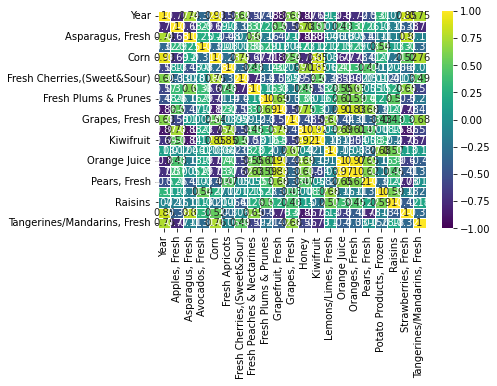

In [553]:
sns.heatmap(corrMatrix,annot = True, cmap='viridis',vmin=-1,vmax=1, linewidth = 1)

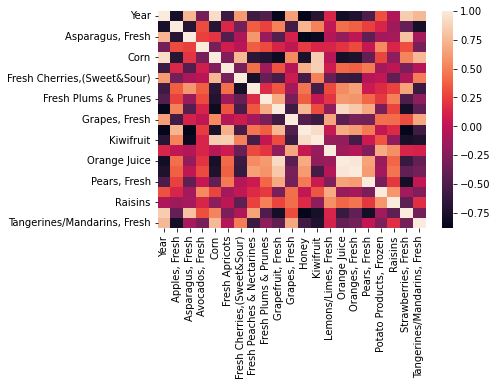

In [556]:
dataplot = sns.heatmap(pivoted.corr())

<AxesSubplot:>

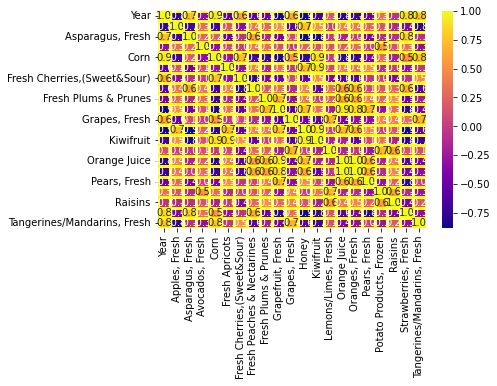

In [565]:
sns.heatmap(corrMatrix, annot=True, fmt=".1F", cmap="plasma", alpha = 1, annot_kws={"size":10}, linewidths = 2.5, linecolor = 'yellow')

### Now moving onto Linear Regression Models for Honey, Kiwifruit, and Strawberries. First, we will examine how the production value of Honey has changed over time.

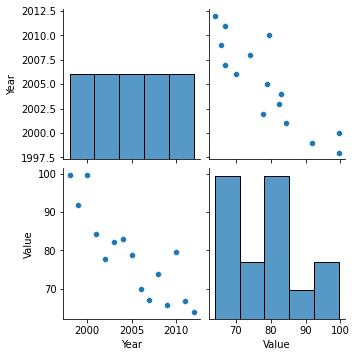

In [507]:
sns.pairplot(Honey)

### The relationship here looks linear, heading downwards as the years progressed from 1998 to 2012, hence the negative correlation between year and honey standing at -0.87

<AxesSubplot:xlabel='Value', ylabel='Density'>

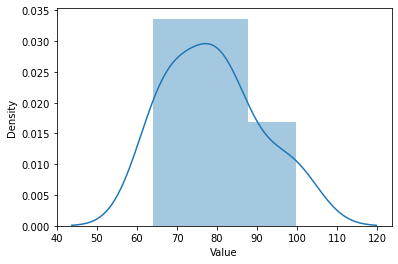

In [508]:
sns.distplot(Honey['Value'])

### As we can see, there is normality, though rough and not perfect.

In [509]:
x = Honey['Year']
y = Honey['Value']

In [510]:
model = sm.OLS(y,x).fit()
model

### Test for Homoscedasticity

In [511]:
pred_val = model.fittedvalues.copy()
true_val = Honey['Value'].values.copy()
residual = true_val - pred_val

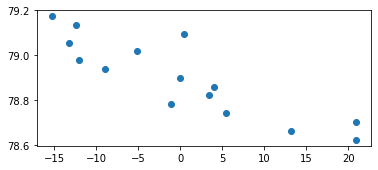

In [512]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### As you can see here, there is some homoscedasticity as the residuals are not splayed out all over the graph, but continue in a linear form

In [513]:
sms.diagnostic.het_breuschpagan(residual, Honey[['Value']])

(7.490383305263311, nan, 13.964143648927381, 0.002210068291160277)

### 13.96: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
### .00221: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means we have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic.

In [514]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-8.158462192373515, pvalue=5.418200929753098e-06)

### The p value is less than 0.05, making it statistically significant, with a F statistic in the negative. This means that this is most definitely heteroscedastic.

### Testing for Multicollinearity

In [418]:
Honey.corr()

,Year,Value
Year,1.000000,-0.868987
Value,-0.868987,1.000000


<AxesSubplot:>

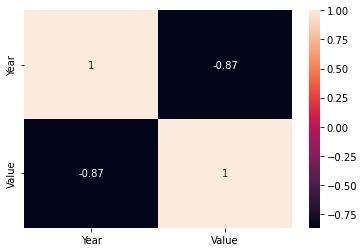

In [419]:
sns.heatmap(Honey.corr(), annot=True)

### Screening for Outliers

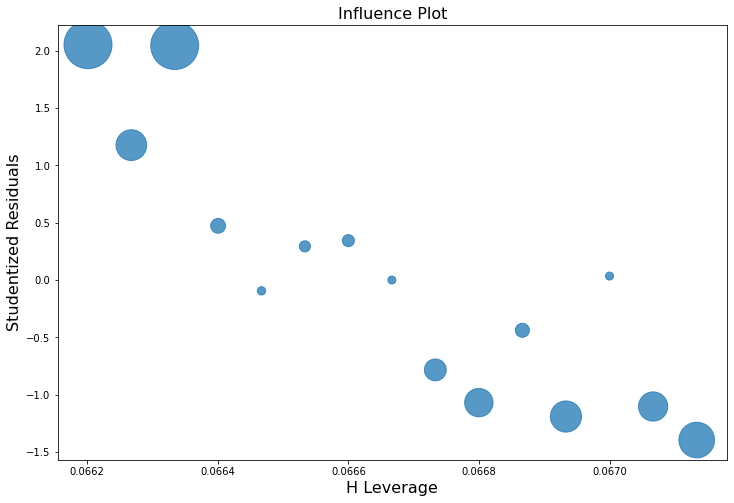

In [515]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

### No studentized residuals greater than 2.5 or 3, so we are good to go

In [516]:
infl = model.get_influence()
print(infl.summary_frame())

      dfb_Year       cooks_d  standard_resid  hat_diag  dffits_internal  \
8298  0.546519  2.429297e-01        1.851111  0.066202         0.492879   
8299  0.313517  9.566227e-02        1.160993  0.066268         0.309293   
8300  0.545049  2.420692e-01        1.845851  0.066334         0.492005   
8301  0.126261  1.687711e-02        0.487128  0.066401         0.129912   
8302 -0.024929  6.688046e-04       -0.096920  0.066467        -0.025861   
8303  0.078670  6.620763e-03        0.304778  0.066533         0.081368   
8304  0.091978  9.028297e-03        0.355713  0.066600         0.095017   
8305  0.000269  7.782790e-08        0.001044  0.066666         0.000279   
8306 -0.209229  4.502384e-02       -0.793514  0.066733        -0.212188   
8307 -0.285637  8.078184e-02       -1.062327  0.066799        -0.284221   
8308 -0.117013  1.453180e-02       -0.450328  0.066866        -0.120548   
8309 -0.318427  9.848699e-02       -1.171729  0.066933        -0.313826   
8310  0.009498  9.714976e

### Everything looks clear as far as there not being any outliers
The DFBETAS value is shown in the dfb_Year column, and if any value is greater than 1, then you have a problem with an influential value.

The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates a problem.

Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, you may have a moderate outlier problem, and if it is over .5, then you have a large outlier problem.

Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, you probably have an outlier problem.

In [425]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              680.9
Date:                Sat, 09 Jul 2022   Prob (F-statistic):                    2.85e-13
Time:                        22:40:22   Log-Likelihood:                         -57.674
No. Observations:                  15   AIC:                                      117.3
Df Residuals:                      14   BIC:                                      118.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0394      0.002     26.093      0.000       0.036       0.043
==============================================================================
Omnibus:                        1.059   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                0.933
Skew:                           0.477   Prob(JB):                        0.627
Kurtosis:                       2.237   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P value is significant, though the F Statistic is large. Because the p value is < .05, you can determine that the Year (or perhaps some event(s) in the years) has a significant effect on the production value of Honey. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for 98% of the variance in explaining decrease in Honey's production value over time.

Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality = *1.059

Prob(Omnibus): This is a test indicating the probabilty that residuals are normally distributed. You would like to see a value close to zero here, to inidcate a normal distribution. = *0.589

Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. = *0.477

Kurtosis: If you have a value close to zero, this means our data is relatively normal. = *2.237

Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data. = *0.522

Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. = *0.933

Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. = *0.627

Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables! =*1.00

### Now we will be moving onto Kiwifruits and this commodity's production value over time

In [426]:
Kiwis = Final[Final.Commodity_Description == 'Kiwifruit']
Kiwis

,Commodity_Description,Year,Value
101,Kiwifruit,1998,31.389
102,Kiwifruit,1999,24.494
103,Kiwifruit,2000,30.844
104,Kiwifruit,2001,23.405
105,Kiwifruit,2002,22.770


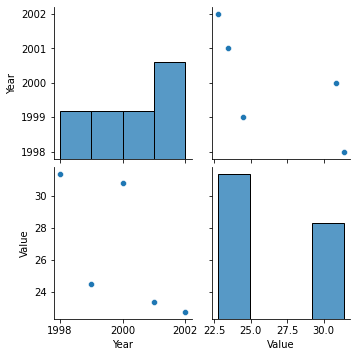

In [427]:
sns.pairplot(Kiwis)

### The relationship here does not looks linear, heading downwards as the years progressed from 1998 to 2002, hence the negative correlation between year and kiwifruit standing at -0.69

<AxesSubplot:xlabel='Value', ylabel='Density'>

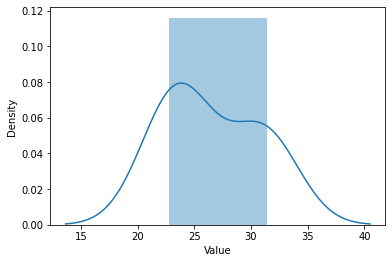

In [518]:
sns.distplot(Kiwis['Value'])

### As we can see, there is normality, though rough and not perfect.

In [519]:
x = Kiwis['Year']
y = Kiwis['Value']

In [520]:
model = sm.OLS(y,x).fit()
model

### Test for Homoscedasticity

In [521]:
pred_val = model.fittedvalues.copy()
true_val = Kiwis['Value'].values.copy()
residual = true_val - pred_val

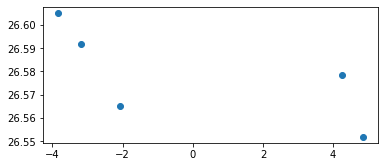

In [522]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### As you can see here, there is no  homoscedasticity as the residuals are displayed out all over the graph

In [523]:
sms.diagnostic.het_breuschpagan(residual, Kiwis[['Value']])

(4.442741295955319, nan, 31.889973283210306, 0.004842835067114109)

### 31.89: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
### .0048: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means we have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic.

In [524]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-18.104567132739632, pvalue=0.03512779595910992)

### The p value is less than 0.05, making it statistically significant, with a F statistic in the negative. This means that this is most definitely heteroscedastic.

### Testing for Multicollinearity

In [525]:
Kiwis.corr()

,Year,Value
Year,1.000000,-0.691431
Value,-0.691431,1.000000


<AxesSubplot:>

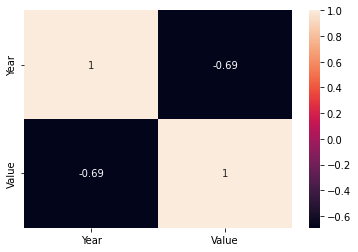

In [526]:
sns.heatmap(Kiwis.corr(), annot=True)

### Screening for Outliers

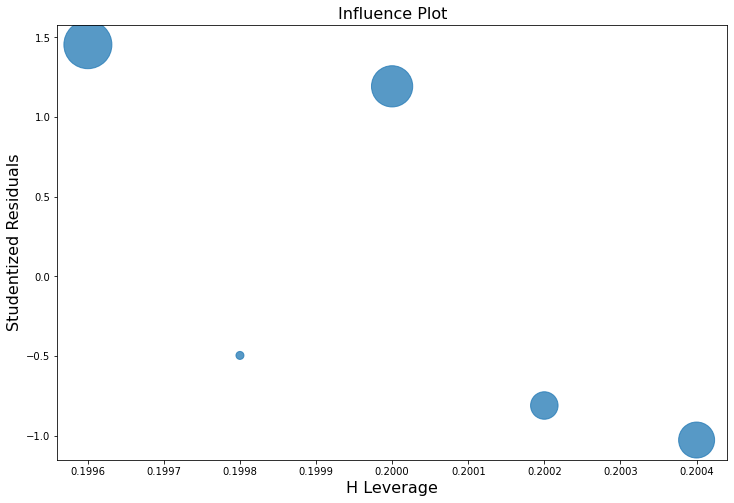

In [527]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

### No studentized residuals greater than 2.5 or 3, so we are good to go

In [528]:
infl = model.get_influence()
print(infl.summary_frame())

     dfb_Year   cooks_d  standard_resid  hat_diag  dffits_internal  \
101  0.725799  0.412161        1.285601    0.1996         0.641997   
102 -0.247834  0.075689       -0.550577    0.1998        -0.275116   
103  0.596098  0.321471        1.133968    0.2000         0.566984   
104 -0.405305  0.179716       -0.847328    0.2002        -0.423929   
105 -0.513992  0.260661       -1.019825    0.2004        -0.510550   

     student_resid    dffits  
101       1.453414  0.725799  
102      -0.495977 -0.247834  
103       1.192195  0.596098  
104      -0.810104 -0.405305  
105      -1.026700 -0.513992  


### Everything looks clear as far as there not being any outliers
The DFBETAS value is shown in the dfb_Year column, and if any value is greater than 1, then you have a problem with an influential value.

The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates a problem.

Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, you may have a moderate outlier problem, and if it is over .5, then you have a large outlier problem. = MODERATE OUTLIER PROBLEM PRESENT @ indices 103-105

Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, you probably have an outlier problem.


In [529]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              199.7
Date:                Sun, 10 Jul 2022   Prob (F-statistic):                    0.000146
Time:                        01:48:37   Log-Likelihood:                         -13.719
No. Observations:                   5   AIC:                                      29.44
Df Residuals:                       4   BIC:                                      29.05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0133      0.001     14.132      0.000       0.011       0.016
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.033
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.765
Skew:                           0.348   Prob(JB):                        0.682
Kurtosis:                       1.214   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P value is significant, though the F Statistic is large. Because the p value is < .05, you can determine that the Year (or perhaps some event(s) in the years) has a significant effect on the production value of Kiwifruits. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for 98% of the variance in explaining decrease in Kiwifruits' production value over time.

Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality = *nan

Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to see a value close to zero here, to inidcate a normal distribution. = *nan

Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. = *0.348

Kurtosis: If you have a value close to zero, this means our data is relatively normal. = *1.214

Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data. = *2.033

Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. = *0.765

Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. = *0.628

Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables! =*1.00

In [531]:
Strawberries = Final[Final.Commodity_Description == 'Strawberries, Fresh']
Strawberries

,Commodity_Description,Year,Value
151,"Strawberries, Fresh",1998,831.254
152,"Strawberries, Fresh",1999,862.778
153,"Strawberries, Fresh",2000,749.471
154,"Strawberries, Fresh",2001,855.294
155,"Strawberries, Fresh",2002,977.945
156,"Strawberries, Fresh",2003,1004.118
157,"Strawberries, Fresh",2004,1028.339
158,"Strawberries, Fresh",2005,1019.449


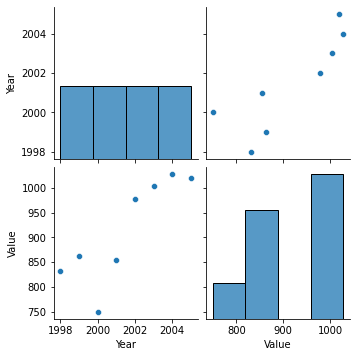

In [532]:
sns.pairplot(Strawberries)

### The relationship here looks somewhat linear, increasing as the years progressed from 1998 to 2005, hence the positive correlation between year and kiwifruit standing at 0.85

<AxesSubplot:xlabel='Value', ylabel='Density'>

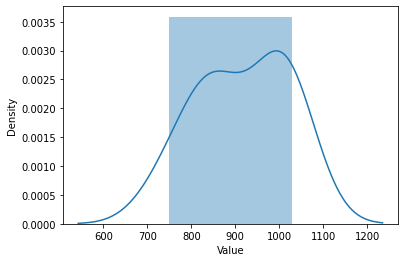

In [533]:
sns.distplot(Strawberries['Value'])

### As we can see, there is normality, though rough and not perfect.

In [534]:
x = Strawberries['Year']
y = Strawberries['Value']

In [535]:
model = sm.OLS(y,x).fit()
model

### Test for Homoscedasticity

In [536]:
pred_val = model.fittedvalues.copy()
true_val = Strawberries['Value'].values.copy()
residual = true_val - pred_val

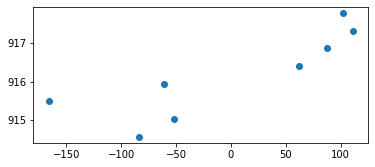

In [537]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### As you can see here, there is no  homoscedasticity as the residuals are displayed out all over the graph

In [538]:
sms.diagnostic.het_breuschpagan(residual, Strawberries[['Value']])

(4.490805692479426, nan, 8.95807900405688, 0.020140489232697657)

### 8.95: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
### .0201: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means we have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic.

In [539]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=5.629354142079034, pvalue=0.004898479950931313)

### The p value is less than 0.05, making it statistically significant, even though the F statistic is in the positive. This means that this is heteroscedastic.

### Testing for Multicollinearity

In [540]:
Strawberries.corr()

,Year,Value
Year,1.000000,0.846488
Value,0.846488,1.000000


<AxesSubplot:>

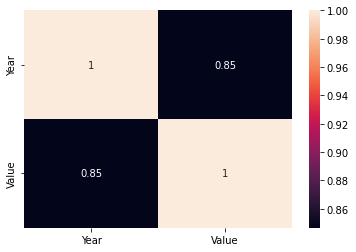

In [541]:
sns.heatmap(Strawberries.corr(), annot=True)

### Screening for Outliers

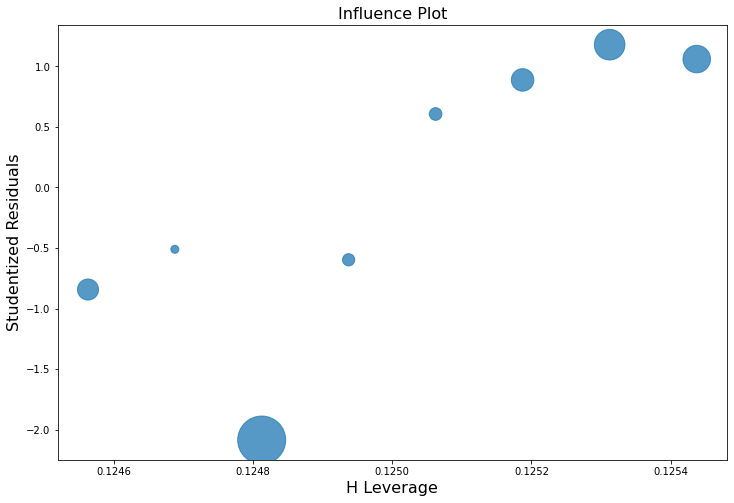

In [546]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

### No studentized residuals greater than 2.5 or 3, so we are good to go

In [548]:
infl = model.get_influence()
print(infl.summary_frame())

     dfb_Year   cooks_d  standard_resid  hat_diag  dffits_internal  \
151 -0.317759  0.105340       -0.860429  0.124563        -0.324562   
152 -0.192616  0.041484       -0.539646  0.124688        -0.203676   
153 -0.787210  0.419309       -1.714701  0.124813        -0.647541   
154 -0.225576  0.056037       -0.626483  0.124937        -0.236721   
155  0.229236  0.057768        0.635722  0.125062         0.240349   
156  0.335793  0.116280        0.901424  0.125187         0.340998   
157  0.446032  0.188480        1.146997  0.125312         0.434143   
158  0.401322  0.158280        1.050496  0.125437         0.397844   

     student_resid    dffits  
151      -0.842394 -0.317759  
152      -0.510344 -0.192616  
153      -2.084548 -0.787210  
154      -0.596989 -0.225576  
155       0.606328  0.229236  
156       0.887666  0.335793  
157       1.178408  0.446032  
158       1.059680  0.401322  


### Everything looks clear as far as there not being any outliers

In [549]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              626.9
Date:                Sun, 10 Jul 2022   Prob (F-statistic):                    4.14e-08
Time:                        01:57:49   Log-Likelihood:                         -47.933
No. Observations:                   8   AIC:                                      97.87
Df Residuals:                       7   BIC:                                      97.95
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.4577      0.018     25.039      0.000       0.415       0.501
==============================================================================
Omnibus:                        1.388   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                0.728
Skew:                          -0.301   Prob(JB):                        0.695
Kurtosis:                       1.650   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P value is significant, though the F Statistic is large. Because the p value is < .05, you can determine that the Year (or perhaps some event(s) in the years) has a significant effect on the production value of Kiwifruits. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for 99% of the variance in explaining increase in Strawberries' production value over time.

Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality = *1.388

Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to see a value close to zero here, to inidcate a normal distribution. = *0.500

Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. = *-0.301

Kurtosis: If you have a value close to zero, this means our data is relatively normal. = *1.650

Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data. = *0.550

Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. = *0.728

Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. = *0.695

Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables! =*1.00